<a href="https://colab.research.google.com/github/FerdousJUST/fish-image-classification-project-final-prediction/blob/main/Fish_Classification_project_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [4]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical') 
test_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    
                                    tf.keras.layers.Conv2D(32,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 

                                    tf.keras.layers.Conv2D(64,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 

                                    tf.keras.layers.Conv2D(128,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(256,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),                                  

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [8]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy',
              #optimizer = 'Adam',
              optimizer = opt,
              metrics = ['accuracy'])

In [9]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [10]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part four/my_model_four.hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [11]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=20, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

<ipython-input-11-e0e9ff04e90b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_fed, shuffle = True, epochs=20, validation_data=test_fed,
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
150/150 - 2644s - loss: 3.0994 - accuracy: 0.4954 - val_loss: 0.8832 - val_accuracy: 0.6617 - lr: 1.0000e-04 - 2644s/epoch - 18s/step
Epoch 2/20
150/150 - 130s - loss: 0.7427 - accuracy: 0.7058 - val_loss: 0.6895 - val_accuracy: 0.7300 - lr: 1.0000e-04 - 130s/epoch - 864ms/step
Epoch 3/20
150/150 - 130s - loss: 0.5759 - accuracy: 0.7850 - val_loss: 0.4739 - val_accuracy: 0.8408 - lr: 1.0000e-04 - 130s/epoch - 865ms/step
Epoch 4/20
150/150 - 129s - loss: 0.4358 - accuracy: 0.8383 - val_loss: 0.4638 - val_accuracy: 0.8400 - lr: 1.0000e-04 - 129s/epoch - 862ms/step
Epoch 5/20
150/150 - 132s - loss: 0.3604 - accuracy: 0.8708 - val_loss: 0.3465 - val_accuracy: 0.8742 - lr: 1.0000e-04 - 132s/epoch - 878ms/step
Epoch 6/20
150/150 - 129s - loss: 0.2849 - accuracy: 0.8971 - val_loss: 0.2602 - val_accuracy: 0.9033 - lr: 1.0000e-04 - 129s/epoch - 861ms/step
Epoch 7/20
150/150 - 129s - loss: 0.2135 - accuracy: 0.9192 - val_loss: 0.2459 - val_accuracy: 0.9092 - lr: 1.0000e-04 - 129s/epoc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

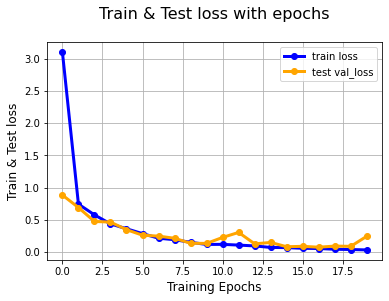

In [12]:
plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train loss', 'test val_loss'], loc='upper right')
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()

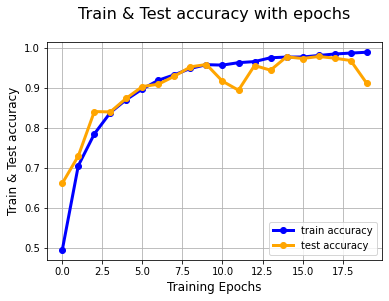

In [13]:
plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train accuracy', 'test accuracy'], loc='lower right')
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

In [14]:
acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


38/38 - 14s - loss: 0.0741 - accuracy: 0.9783 - 14s/epoch - 361ms/step
97.83


In [34]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/Telepia_Image  (4).jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)
#stringprint = "%.1f" % round(rstl[0]*100,1)

#if rslt[0][0] > rslt[0][1]:
  #  prediction = "This is a Barbel Fish"
#else:
   # prediction = "This is a Hilsha Fish"
  #  print(prediction)

1/1 [==============================] - 0s 27ms/step
[[1.3523281e-09 2.3781327e-08 3.8233394e-10 1.0000000e+00]]


In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = model.predict(train_fed)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:\n ",classification_report(y_pred_classes,test_fed))

150/150 [==============================] - 28s 186ms/step


ValueError: ignored

In [27]:
from google.colab import files
uploaded = files.upload()

Saving Telepia_Image  (4).jpg to Telepia_Image  (4).jpg


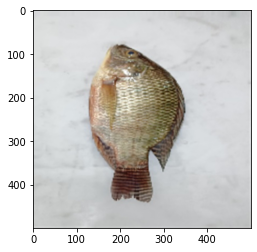

In [28]:
new_image = plt.imread('Telepia_Image  (4).jpg')
img= plt.imshow(new_image)

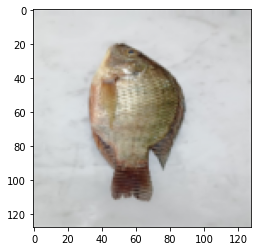

In [29]:
from skimage.transform import resize
resized_image = resize(new_image,(128,128,3))
img = plt.imshow(resized_image)

In [30]:
predictions = model.predict(np.array([resized_image]))
predictions

1/1 [==============================] - 0s 27ms/step


array([[0.24682969, 0.22934745, 0.26335344, 0.26046938]], dtype=float32)

In [31]:
list_index = [0,1,2,3]
x = predictions

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

[2, 3, 0, 1]


In [32]:
classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']

In [33]:
for i in range(4):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2),'%')


Spotted_Snakehead_Fish : 26.34 %
Tilapia_Fish : 26.05 %
Barbel_Fish : 24.68 %
Hilsha_Fish : 22.93 %
